<a href="https://colab.research.google.com/github/saugata-malakar/Summer-Analytics-2021-IIT-Guwahati/blob/main/Predicting_Laptop_Prices_with_Hybrid_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ironwolf437_laptop_price_dataset_path = kagglehub.dataset_download('ironwolf437/laptop-price-dataset')

print('Data source import complete.')


# Import libraris

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'catboost'

In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTE

In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ironwolf437_laptop_price_dataset_path = kagglehub.dataset_download('ironwolf437/laptop-price-dataset')

print('Data source import complete.')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
# Install catboost if not already installed
!pip install catboost
from catboost import CatBoostRegressor # Now import catboost
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

100%|██████████| 24.5k/24.5k [00:00<00:00, 10.7MB/s]

Extracting files...
Data source import complete.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [5]:
df = pd.read_csv("/content/laptop_price - dataset (1).csv")

In [6]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [7]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
CPU_Company,0
CPU_Type,0
CPU_Frequency (GHz),0
RAM (GB),0
Memory,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [9]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [10]:
df.shape

(1275, 15)

In [11]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [12]:
df.duplicated().sum().item()

0

In [13]:
df.describe(include='all')

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
count,1275,1275,1275,1275.000000,1275,1275,1275,1275.000000,1275.000000,1275,1275,1275,1275,1275.000000,1275.000000
unique,19,618,6,NaN,40,3,93,NaN,NaN,39,4,106,9,NaN,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel,Core i5 7200U,NaN,NaN,256GB SSD,Intel,HD Graphics 620,Windows 10,NaN,NaN
freq,291,30,707,NaN,505,1214,193,NaN,NaN,412,704,280,1048,NaN,NaN
mean,NaN,NaN,NaN,15.022902,NaN,NaN,NaN,2.302980,8.440784,NaN,NaN,NaN,NaN,2.040525,1134.969059
std,NaN,NaN,NaN,1.429470,NaN,NaN,NaN,0.503846,5.097809,NaN,NaN,NaN,NaN,0.669196,700.752504
min,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,0.900000,2.000000,NaN,NaN,NaN,NaN,0.690000,174.000000
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,NaN,NaN,1.500000,609.000000
50%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,2.500000,8.000000,NaN,NaN,NaN,NaN,2.040000,989.000000
75%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,2.700000,8.000000,NaN,NaN,NaN,NaN,2.310000,1496.500000


# Data Analysis

<ipython-input-14-1680b52da6b1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Company', palette='Set2')


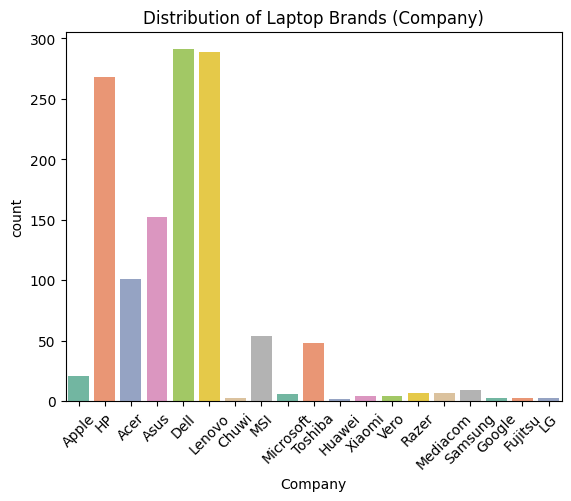

In [14]:
sns.countplot(data=df, x='Company', palette='Set2')
plt.title('Distribution of Laptop Brands (Company)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
sns.countplot(data=df, x='Product', palette='Set1')
plt.title('Distribution of Laptop Products')
plt.xticks(rotation=90)
plt.show()


<ipython-input-15-3379c7a581da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Company', y='Price (Euro)', palette='coolwarm')


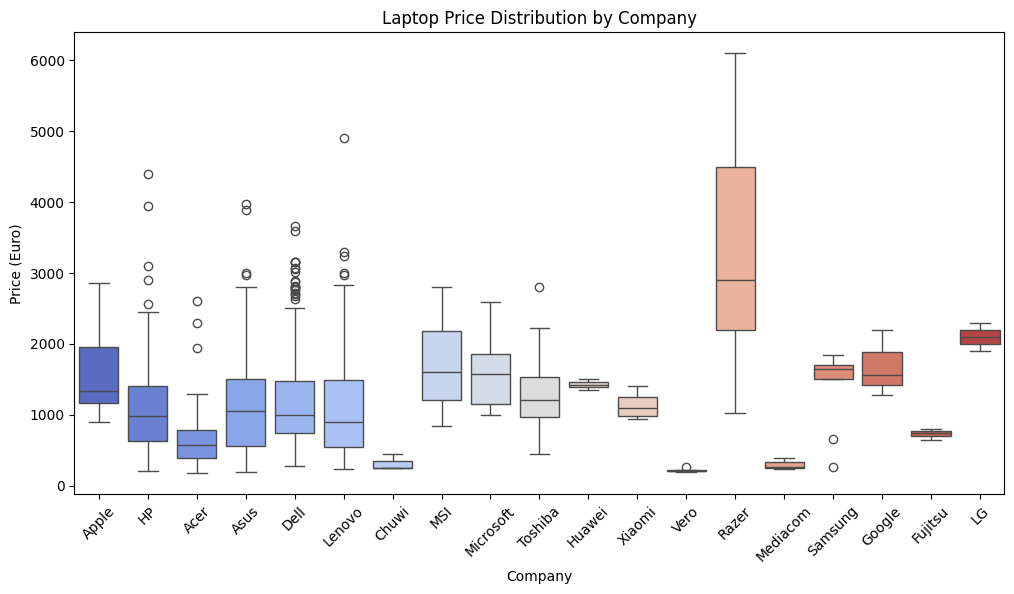

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Company', y='Price (Euro)', palette='coolwarm')
plt.title('Laptop Price Distribution by Company')
plt.xticks(rotation=45)
plt.show()


<ipython-input-16-0b67128a94f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TypeName', y='Price (Euro)', palette='muted')


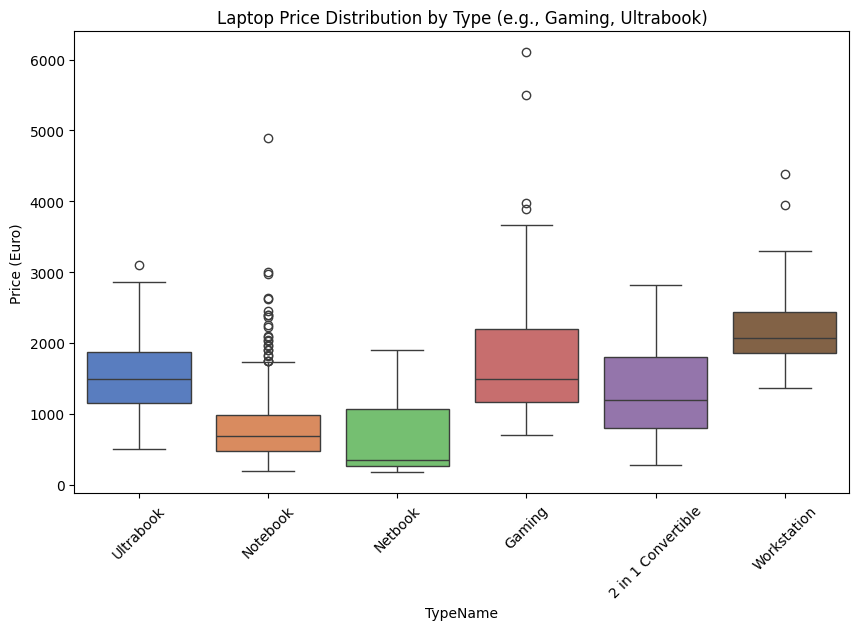

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='TypeName', y='Price (Euro)', palette='muted')
plt.title('Laptop Price Distribution by Type (e.g., Gaming, Ultrabook)')
plt.xticks(rotation=45)
plt.show()


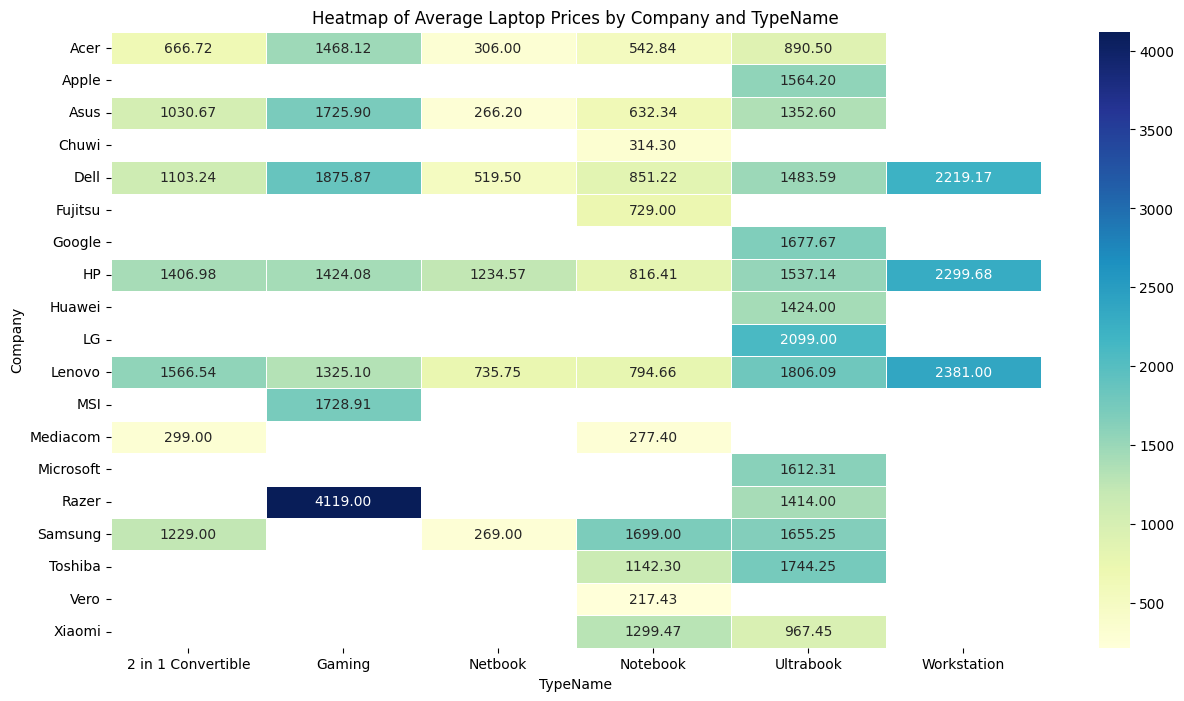

In [17]:
category_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company', 'CPU_Type',
                    'Memory', 'GPU_Company', 'GPU_Type', 'OpSys']

category_avg_price = df[category_columns + ['Price (Euro)']].groupby(category_columns)['Price (Euro)'].mean().reset_index()
category_avg_price_pivot = category_avg_price.pivot_table(values='Price (Euro)', columns='TypeName', index='Company')

plt.figure(figsize=(15,8))
sns.heatmap(category_avg_price_pivot, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Average Laptop Prices by Company and TypeName')
plt.show()


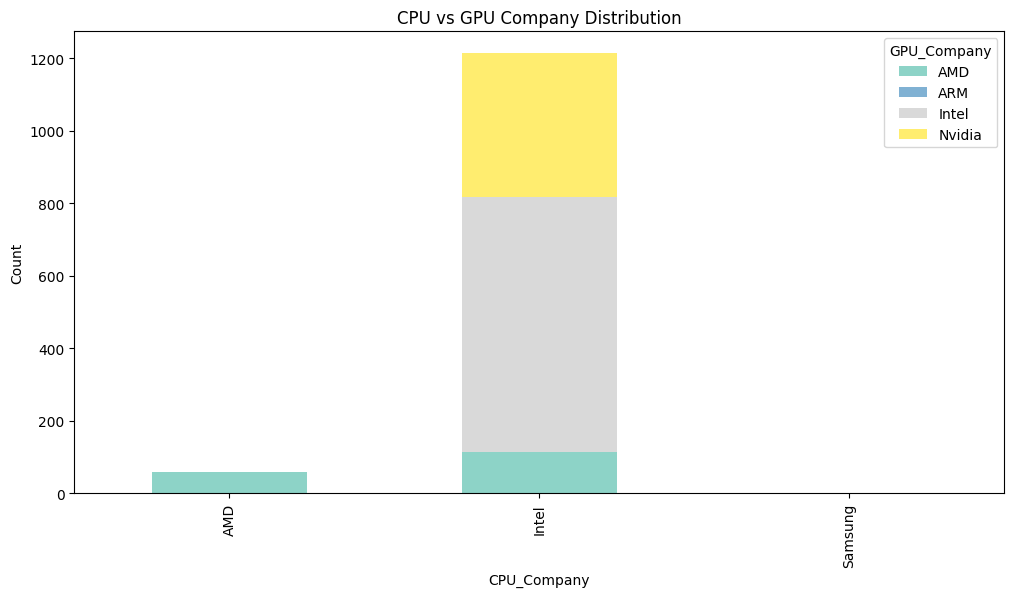

In [18]:
crosstab_cpu_gpu = pd.crosstab(df['CPU_Company'], df['GPU_Company'])
crosstab_cpu_gpu.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.title('CPU vs GPU Company Distribution')
plt.ylabel('Count')
plt.show()


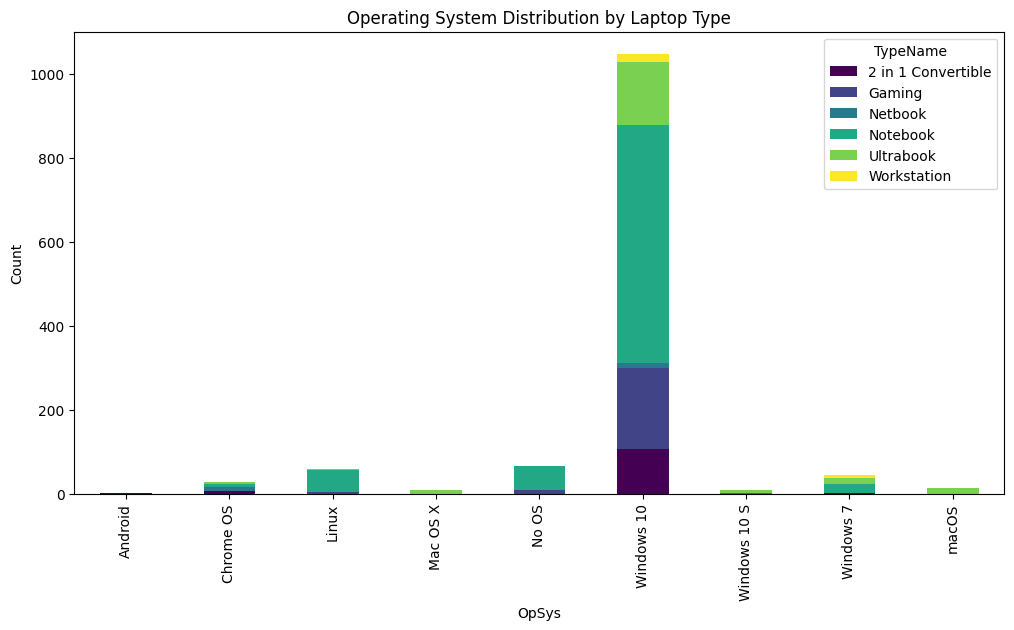

In [20]:
crosstab_op_sys_type = pd.crosstab(df['OpSys'], df['TypeName'])
crosstab_op_sys_type.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Operating System Distribution by Laptop Type')
plt.ylabel('Count')
plt.show()


In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['Product'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Laptop Product Names')
plt.axis('off')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test for TypeName vs Company
contingency_table = pd.crosstab(df['TypeName'], df['Company'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}, p-value: {p}")


In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['Inches'], kde=True, color='skyblue', bins=15)
plt.title('Distribution of Laptop Screen Size (Inches)')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['CPU_Frequency (GHz)'], kde=True, color='lightgreen', bins=15)
plt.title('Distribution of CPU Frequency (GHz)')
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['RAM (GB)'], kde=True, color='coral', bins=10)
plt.title('Distribution of RAM (GB)')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Weight (kg)', color='lightcoral')
plt.title('Boxplot of Laptop Weight (kg)')
plt.xlabel('Weight (kg)')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Price (Euro)', color='purple')
plt.title('Boxplot of Laptop Price (Euro)')
plt.xlabel('Price (Euro)')
plt.show()


In [ ]:
sns.pairplot(df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='RAM (GB)', y='Price (Euro)', color='blue')
plt.title('Scatterplot of RAM vs. Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='CPU_Frequency (GHz)', y='Price (Euro)', color='green')
plt.title('Scatterplot of CPU Frequency vs. Price')
plt.xlabel('CPU Frequency (GHz)')
plt.ylabel('Price (Euro)')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Weight (kg)', y='Price (Euro)', color='red')
plt.title('Scatterplot of Weight vs. Price')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (Euro)')
plt.show()


In [ ]:
# Calculate the correlation matrix
corr_matrix = df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)', 'Price (Euro)']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='Price (Euro)', hue='RAM (GB)', fill=True, common_norm=False, palette='viridis')
plt.title('KDE of Price by RAM')
plt.xlabel('Price (Euro)')
plt.ylabel('Density')
plt.show()


In [ ]:
plt.figure(figsize=(8,7.5))
sns.kdeplot(data=df, x='Price (Euro)', hue='CPU_Frequency (GHz)', fill=True, common_norm=False, palette='Blues')
plt.title('KDE of Price by CPU Frequency')
plt.xlabel('Price (Euro)')
plt.ylabel('Density')
plt.show()


# Company

In [ ]:
company = df['Company'].value_counts()

sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
company = company.sort_values(ascending=True)
company.plot(kind='barh', edgecolor='#1F77B4', title='Laptop manufacturer')
pd.DataFrame(company.sort_values(ascending=False))

# Type name

In [ ]:
TypeName = df['TypeName'].value_counts()

sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
TypeName.plot(kind='bar', color='#BD3A3C', edgecolor='#BD3A3C', title='TypeName')
plt.xticks(rotation=30)
pd.DataFrame(TypeName)

In [ ]:
Inches = df['Inches'].value_counts()

sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
Inches = Inches.sort_values(ascending=True)
Inches.plot(kind='barh', color='green', edgecolor='green', title='Screen Size')
pd.DataFrame(Inches.sort_values(ascending=False))

In [ ]:
memory = df['Memory'].value_counts()

plt.figure(figsize=(8,10))
sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
memory = memory.sort_values(ascending=True)
memory.plot(kind='barh', color='#2B9479', edgecolor='#2B9479')
pd.DataFrame(memory.sort_values(ascending=False))

In [ ]:
price = df['Price (Euro)']

#plt.figure(figsize=(10,4))
sns.histplot(price, kde=True)
plt.xticks(rotation=0)
pd.DataFrame(price.describe())

In [ ]:
df[df['Price (Euro)'] == 174]

# Collective data analysis

In [ ]:
sns.barplot(x = df['Company'], y = df['Price (Euro)'])
plt.xticks(rotation='vertical')
plt.title('Company & Price (Euro)')
plt.show()

# Type to price Euro

In [ ]:
sns.barplot(x = df['TypeName'], y = df['Price (Euro)'])
plt.xticks(rotation='vertical')
plt.title('TypeName & Price (Euro)')
plt.show()

# Inches to price  (Euro)

In [ ]:
sns.barplot(x = df['Inches'], y = df['Price (Euro)'])
plt.xticks(rotation='vertical')
plt.title('Inches & Price (Euro)')
plt.show()

In [ ]:
sns.barplot(x = df['CPU_Company'], y = df['Price (Euro)'])
plt.xticks(rotation='vertical')
plt.title('CPU_Company & Price (Euro)')
plt.show()

# Data prerposeesing


In [ ]:
encoder = LabelEncoder()

df['Company'] = encoder.fit_transform(df['Company'])
df['Product'] = encoder.fit_transform(df['Product'])
df['TypeName'] = encoder.fit_transform(df['TypeName'])
df['ScreenResolution'] = encoder.fit_transform(df['ScreenResolution'])
df['CPU_Company'] = encoder.fit_transform(df['CPU_Company'])
df['CPU_Type'] = encoder.fit_transform(df['CPU_Type'])
df['Memory'] = encoder.fit_transform(df['Memory'])
df['GPU_Company'] = encoder.fit_transform(df['GPU_Company'])
df['GPU_Type'] = encoder.fit_transform(df['GPU_Type'])
df['OpSys'] = encoder.fit_transform(df['OpSys'])

In [ ]:
df.head()

# Divid input and output

In [ ]:
x = df.iloc[ : , 0:-1]
y = df.iloc[ : , -1]

In [ ]:
x

In [ ]:
y

# scaling

In [ ]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [ ]:
x

In [ ]:
# Convert to DataFrame
y_df = y.to_frame()

# Fit and transform y
y = scaler.fit_transform(y_df)

In [ ]:
y

# Train & Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

# ML Model

In [ ]:
model_1 = LinearRegression()
model_2 = SGDRegressor()
model_3 = Lasso()
model_4 = Ridge()
model_5 = ElasticNet()
model_6 = SVR()
model_7 = KNeighborsRegressor()
model_8 = DecisionTreeRegressor()
model_9 = RandomForestRegressor()
model_10 = BaggingRegressor()
model_11 = ExtraTreesRegressor()
model_12 = AdaBoostRegressor()
model_13 = XGBRegressor(verbose=0)
model_14 = CatBoostRegressor(verbose=0)
model_15 = LGBMRegressor(verbose=0)

In [ ]:
model_1.fit(x_train,y_train)

In [ ]:
model_2.fit(x_train,y_train)

In [ ]:
model_3.fit(x_train,y_train)

In [ ]:
model_4.fit(x_train,y_train)

In [ ]:
model_5.fit(x_train,y_train)
#model_6.fit(x_train,y_train)

In [ ]:
model_6.fit(x_train,y_train)

In [ ]:
model_7.fit(x_train,y_train)

In [ ]:
model_8.fit(x_train,y_train)

In [ ]:
model_9.fit(x_train,y_train)

In [ ]:
model_10.fit(x_train,y_train)

In [ ]:
model_11.fit(x_train,y_train)

In [ ]:
model_12.fit(x_train,y_train)

In [ ]:
model_13.fit(x_train,y_train)

In [ ]:
model_14.fit(x_train,y_train)

In [ ]:
model_15.fit(x_train,y_train)

In [ ]:
df.columns

In [ ]:
# List of models:
models = [model_1, model_2, model_3, model_4, model_5,
          model_6, model_7, model_8, model_9, model_10,
          model_11, model_12, model_13, model_14, model_15]
models_names = ['LinearRegression', 'SGDRegressor', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor', 'XGBRegressor', 'CatBoostRegressor', 'LGBMRegressor']

# Calculate predictions and squared errors for each model:
squared_errors = []
for model in models:
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    squared_errors.append(f'{mse * 100:.2f}%')  # Format as percentage

# Calculate train and test scores:
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]

# Difference between training and testing ratio
ratio = []
for train, test in zip(train_score, test_score):
    result = train - test
    ratio.append(f'{result * 100:.2f}%')

# Measure model state:6
rate = []
for train, test in zip(train_score, test_score):
    if train <= 0.65 and test <= 0.65:
        rate.append('bad')
    elif train > test * 1.10:
        rate.append('overfite')
    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
        rate.append('middle')
    elif train >= 0.80 and test >= 0.80 and train < 1.00 and test < 1.00:
        rate.append('good')
    elif train >= 0.80 and test < 0.80:
        rate.append('high train, low test')
    else:
        rate.append('unknown')

# Create DataFrame
model_score = pd.DataFrame({
    'Model': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
    'Ratio difference': ratio,
    'Evaluate model': rate,
    'Squared error': squared_errors
})

# Show result:
model_score

In [ ]:


# Set up figure size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Bar plot for Train and Test Scores
train_scores = [float(score[:-1]) for score in model_score['Train score']]  # Removing the percentage sign
test_scores = [float(score[:-1]) for score in model_score['Test score']]  # Removing the percentage sign

x = np.arange(len(models_names))  # Number of models

width = 0.35  # Width of the bars
fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train Score', color='blue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test Score', color='orange')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Score (%)')
ax.set_title('Train and Test Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models_names, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# If you like my notebook please upvote ...